In [1]:
import numpy as np
import mysql.connector as cnt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DB = cnt.connect(
    host='localhost',
    port = 3306,
    user= 'root',
    password ='L10Antanas'
)
c = DB.cursor()

In [3]:
c.execute("use `Mental health Depression disorder Data`")

In [18]:
c.execute('show tables')

In [64]:
sql = """Select Entity, year, `Drug use disorders (%)`
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
Where year Between 2012 and 2017
and Entity = 'Lithuania';"""



c.execute(sql)
ats = c.fetchall()

salis = []
metai= []
narkotikai =[]

for eilute in ats:
    salis.append(eilute[0])
    metai.append(eilute[1])
    narkotikai.append(float((eilute[2]))*100)


In [69]:
sql2 = """Select year, avg(`Drug use disorders (%)`)
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
Where year Between 2012 and 2017
group by year;"""

c.execute(sql2)
ats2 = c.fetchall()

metai2= []
vid = []

for eilute in ats2:
    metai2.append(eilute[0])
    vid.append(float((eilute[1]))*100)

In [70]:
print(narkotikai)
print(vid)

[58.2031, 58.9413, 59.7858, 60.783699999999996, 61.8851, 63.1073]
[86.06686296296296, 86.17477777777776, 86.28623703703703, 86.41857777777778, 86.54588888888887, 86.64450740740742]


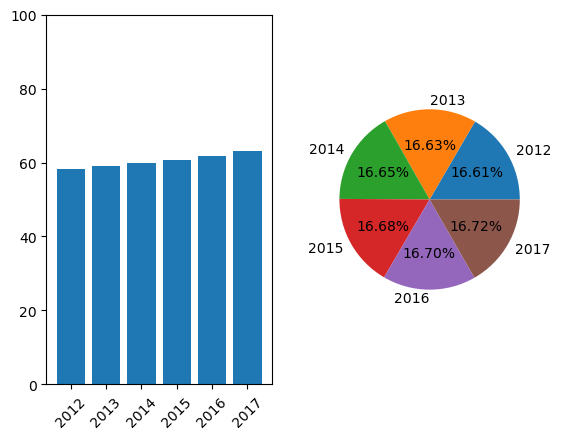

In [72]:
fig, ax= plt.subplots(1,2)
x= np.arange(0, len(metai))
ax1.bar(x, narkotikai)

ax.set_xticks(x)
ax.set_xticklabels(metai, rotation = 45)
ax.set_ylim(0, 100)


plt.show()

Nuskaityti duomenis is kompiuterio per pandas

In [4]:
duomenys = pd.read_sql_query('select * from `mental health depression disorder data`.`mental health depression disorder data`',con = DB)
duomenys.head(2)

/Users/antanas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.82974,1.684746,4.079531,0.671768


1 grupuoti pagal sali
2 pasirinkti norima sali ir metus. 
3 atsirinkti ligos % 
4 braizyti barus.

Nuskaityti duomenis is kompiuterio per pandas

In [5]:
EU = pd.read_sql_query('select * from `mental health depression disorder data`.`eu_countries`',con = DB)
EU.head(2)

/Users/antanas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name
0,Austria
1,Belgium


Susitvarkyti duomenis, kad rodytu tik EU nares, panaudoti pandas join funkcija

In [6]:
euduomenys = pd.merge(EU, duomenys, how= 'inner', left_on = 'name', right_on = 'Entity')
euduomenys.head(15)

,name,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Austria,336,Austria,AUT,1990,0.255762,0.945389,0.538327,5.357604,0.790297,3.606204,1.709916
1,Austria,337,Austria,AUT,1991,0.255935,0.945485,0.544497,5.356666,0.792971,3.615811,1.714560
2,Austria,338,Austria,AUT,1992,0.256090,0.945641,0.551231,5.356393,0.796980,3.622927,1.721153
3,Austria,339,Austria,AUT,1993,0.256216,0.945819,0.558080,5.356464,0.800853,3.627022,1.729197
4,Austria,340,Austria,AUT,1994,0.256308,0.945990,0.564511,5.356490,0.803948,3.627884,1.738368
5,Austria,341,Austria,AUT,1995,0.256363,0.946142,0.571197,5.356551,0.808692,3.624869,1.748054
6,Austria,342,Austria,AUT,1996,0.256397,0.946397,0.578680,5.357533,0.815625,3.612334,1.768456
7,Austria,343,Austria,AUT,1997,0.256411,0.946717,0.586003,5.358962,0.822941,3.581562,1.803538
8,Austria,344,Austria,AUT,1998,0.256415,0.947071,0.594088,5.360613,0.831917,3.544212,1.843518
9,Austria,345,Austria,AUT,1999,0.256412,0.947350,0.600741,5.361666,0.839702,3.505552,1.878918


In [18]:
salys = grcountry.groups.keys()
Schizophrenia = []
for liga in salys:
    Schizophrenia.append(grcountry.get_group(liga)['Schizophrenia (%)'])
    

In [74]:
grcountry = euduomenys[euduomenys['Year'] >= 2012].groupby('Entity')
grcountry.head(10)

,name,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
22,Austria,358,Austria,AUT,2012,0.256269,0.939930,0.671955,5.350918,0.914498,3.278564,1.940299
23,Austria,359,Austria,AUT,2013,0.256354,0.939909,0.672787,5.349690,0.914287,3.273578,1.925424
24,Austria,360,Austria,AUT,2014,0.256479,0.939861,0.673911,5.347641,0.912597,3.267460,1.906362
25,Austria,361,Austria,AUT,2015,0.256627,0.939758,0.674850,5.344587,0.910998,3.264032,1.883372
26,Austria,362,Austria,AUT,2016,0.256783,0.939716,0.674727,5.342175,0.907326,3.262611,1.855808
...,...,...,...,...,...,...,...,...,...,...,...,...
751,Sweden,5567,Sweden,SWE,2013,0.276273,1.058865,0.555076,5.301412,0.647249,4.533727,1.808595
752,Sweden,5568,Sweden,SWE,2014,0.275014,1.058557,0.559841,5.299064,0.663567,4.524133,1.770598
753,Sweden,5569,Sweden,SWE,2015,0.273600,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177
754,Sweden,5570,Sweden,SWE,2016,0.272043,1.058056,0.569377,5.295184,0.706037,4.500420,1.659861


Susigrupuoti duomenis pagal Lietuvos grupe

In [213]:
Lietuva = grcountry.get_group('Lithuania')
Lietuva.head(6)

,name,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
470,Lithuania,3298,Lithuania,LTU,2012,0.198059,0.696554,0.218648,2.924710,0.582031,4.188997,4.544162
471,Lithuania,3299,Lithuania,LTU,2013,0.198600,0.697127,0.221894,2.926594,0.589413,4.176505,4.534467
472,Lithuania,3300,Lithuania,LTU,2014,0.199167,0.697776,0.225181,2.928742,0.597858,4.168826,4.517930
473,Lithuania,3301,Lithuania,LTU,2015,0.199760,0.698522,0.228347,2.931244,0.607837,4.158024,4.494683
474,Lithuania,3302,Lithuania,LTU,2016,0.200374,0.699381,0.231187,2.934140,0.618851,4.150702,4.464844
475,Lithuania,3303,Lithuania,LTU,2017,0.200982,0.700278,0.234095,2.937224,0.631073,4.143254,4.428001


In [214]:
metai = Lietuva['Year'].values
Schizo = Lietuva['Schizophrenia (%)'].values
Schizo = [round(x, 3) for x in Schizo]
Bipolar = Lietuva['Bipolar disorder (%)'].values
Bipolar = [round(x, 3) for x in Bipolar]
Eating = Lietuva['Eating disorders (%)'].values
Eating = [round(x, 3) for x in Eating]
Anx = Lietuva['Anxiety disorders (%)'].values
Anx = [round(x, 2) for x in Anx]
Drug = Lietuva['Drug use disorders (%)'].values
Drug = [round(x, 2) for x in Drug]
Dep = Lietuva['Depression (%)'].values
Dep = [round(x, 2) for x in Dep]
Alko = Lietuva['Alcohol use disorders (%)'].values
Alko = [round(x, 2) for x in Alko]

In [209]:
print(metai)
print(Schizo)
print(Bipolar)
print(Eating)

[2012 2013 2014 2015 2016 2017]
[0.198, 0.199, 0.199, 0.2, 0.2, 0.201]
[0.697, 0.697, 0.698, 0.699, 0.699, 0.7]
[0.22, 0.22, 0.23, 0.23, 0.23, 0.23]


Braizyti barchart lietuvai

Nubraizyti 3 grafikus, kur lyginamas Lietuvos ir EU saliu vidurkis, grafike pazymeti auksciausia ir zemiausia reiksmes, kuriais metais tai buvo.

In [215]:
sql3 = """Select year, avg(`Schizophrenia (%)`)
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
Where year Between 2012 and 2017
group by year;"""

c.execute(sql3)
ats3 = c.fetchall()

vid_sch = []

for eilute in ats3:
    vid_sch.append(round(float((eilute[1])), 3))

In [216]:
sql4 = """Select year, avg(`Bipolar disorder (%)`)
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
Where year Between 2012 and 2017
group by year;"""

c.execute(sql4)
ats4 = c.fetchall()

vid_bip = []

for eilute in ats4:
    vid_bip.append(round(float((eilute[1])), 3))

top bipolar

In [217]:
sql6= """Select name, year, max(`Bipolar disorder (%)`) as Auksciause_reiksme 
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
where year between 2012 and 2017
group by name, year
order by min(`Bipolar disorder (%)`) DESC
limit 1;"""

c.execute(sql6)
ats6 = c.fetchall()

metaitop =[]
salistop = []
reiksmetop = []

for reiksme in ats6:
    metaitop.append(int((reiksme[1])))
    salistop.append(reiksme[0])
    reiksmetop.append(round(float((reiksme[2])), 3))
print(metaitop)
print(salistop)
print(reiksmetop)

[2012]
['Sweden']
[1.059]


Min bipolar

In [176]:
sql7= """Select name, year, min(`Bipolar disorder (%)`) as Maziausia_reiksme 
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
where year between 2012 and 2017
group by name, year
order by min(`Bipolar disorder (%)`) ASC
limit 1;"""

c.execute(sql7)
ats7 = c.fetchall()

metaimin =[]
salismin = []
reiksmemin = []

for reiksme in ats7:
    metaimin.append(int((reiksme[1])))
    salismin.append(reiksme[0])
    reiksmemin.append(float((reiksme[2])))
print(metaimin)
print(salismin)
print(reiksmemin)

[2012]
['Bulgaria']
[0.629638]


In [130]:
sql5 = """Select year, avg(`Eating disorders (%)`)
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
Where year Between 2012 and 2017
group by year;"""

c.execute(sql5)
ats5 = c.fetchall()

vid_eat = []

for eilute in ats5:
    vid_eat.append(round(float((eilute[1])),2))

max eating

In [183]:
sql8= """Select name, year, max(`Eating disorders (%)`) as Auksciause_reiksme 
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
where year between 2012 and 2017
group by name, year
order by min(`Bipolar disorder (%)`) DESC
limit 1;"""

c.execute(sql8)
ats8 = c.fetchall()

metaitop8 =[]
salistop8 = []
reiksmetop8 = []

for reiksme in ats8:
    metaitop8.append(int((reiksme[1])))
    salistop8.append(reiksme[0])
    reiksmetop8.append(round(float((reiksme[2])), 2))
print(metaitop8)
print(salistop8)
print(reiksmetop8)

[2012]
['Sweden']
[0.55]


min eating

In [189]:
sql9= """Select name, year, min(`Eating disorders (%)`) as Maziausia_reiksme 
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
where year between 2012 and 2017
group by name, year
order by min(`Bipolar disorder (%)`) ASC
limit 1;"""

c.execute(sql9)
ats9 = c.fetchall()

metaimin9 =[]
salismin9 = []
reiksmemin9 = []

for reiksme in ats9:
    metaimin9.append(int((reiksme[1])))
    salismin9.append(reiksme[0])
    reiksmemin9.append(round(float((reiksme[2])),2))
print(metaimin9)
print(salismin9)
print(reiksmemin9)

[2012]
['Bulgaria']
[0.19]


shizo top

In [192]:
sql10= """Select name, year, max(`Schizophrenia (%)`) as Auksciause_reiksme 
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
where year between 2012 and 2017
group by name, year
order by min(`Bipolar disorder (%)`) DESC
limit 1;"""

c.execute(sql10)
ats10 = c.fetchall()

metaitop10 =[]
salistop10 = []
reiksmetop10 = []

for reiksme in ats10:
    metaitop10.append(int((reiksme[1])))
    salistop10.append(reiksme[0])
    reiksmetop10.append(round(float((reiksme[2])), 2))
print(metaitop10)
print(salistop10)
print(reiksmetop10)

[2012]
['Sweden']
[0.28]


shizo min

In [193]:
sql11= """Select name, year, min(`Eating disorders (%)`) as Maziausia_reiksme 
FROM eu_countries
LEFT JOIN `mental health depression disorder data`
ON name = entity
where year between 2012 and 2017
group by name, year
order by min(`Bipolar disorder (%)`) ASC
limit 1;"""

c.execute(sql11)
ats11 = c.fetchall()

metaimin11 =[]
salismin11 = []
reiksmemin11 = []

for reiksme in ats11:
    metaimin11.append(int((reiksme[1])))
    salismin11.append(reiksme[0])
    reiksmemin11.append(round(float((reiksme[2])),2))
print(metaimin11)
print(salismin11)
print(reiksmemin11)

[2012]
['Bulgaria']
[0.19]


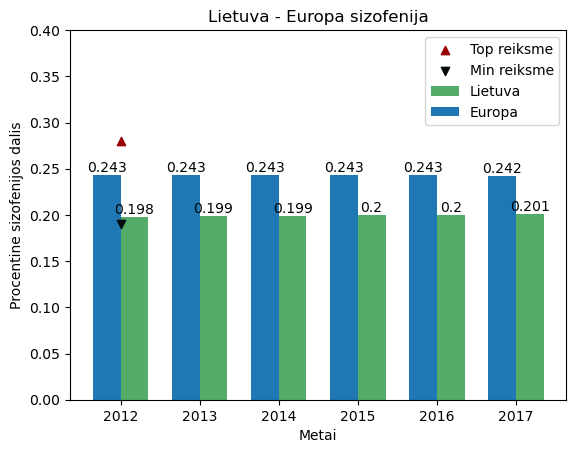

In [262]:
fig, ax = plt.subplots()

w= 0.35
A =ax.bar(metai+ w/2, Schizo,width=w, label = "Lietuva", color= '#54ac68')
B =ax.bar(metai- w/2, vid_sch,width=w, label = 'Europa')
ax.set_ylim(0, 0.4)
ax.bar_label(A)
ax.bar_label(B)
ax.scatter(metaitop10, reiksmetop10,marker= "^", label = "Top reiksme", color = '#980002')
ax.scatter(metaimin11, reiksmemin11, marker= "v",label = "Min reiksme", color = '#070d0d')
plt.legend()
plt.title('Lietuva - Europa sizofenija')
plt.xlabel("Metai")
plt.ylabel("Procentine sizofenijos dalis")
plt.show()

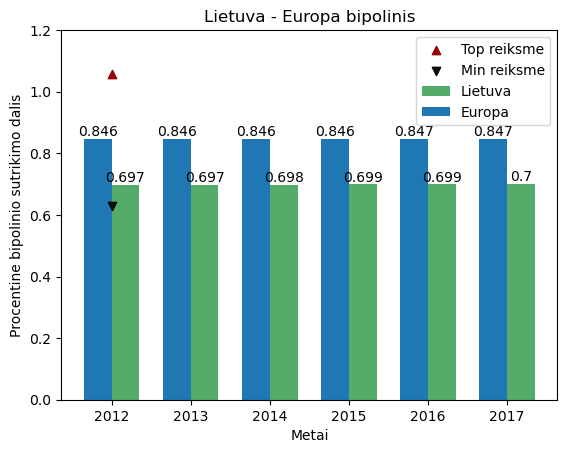

In [261]:
fig, ax = plt.subplots()

w= 0.35
A =ax.bar(metai+ w/2, Bipolar,width=w, label = "Lietuva", color= '#54ac68')
B =ax.bar(metai- w/2, vid_bip,width=w, label = 'Europa')
ax.set_ylim(0, 1.2)
ax.bar_label(A)
ax.bar_label(B)
ax.scatter(metaitop, reiksmetop,marker= "^", label = "Top reiksme", color = '#980002')
ax.scatter(metaimin, reiksmemin, marker= "v",label = "Min reiksme", color = '#070d0d')
plt.legend()
#plt.legend(loc='upper left')
plt.title('Lietuva - Europa bipolinis')
plt.xlabel("Metai")
plt.ylabel("Procentine bipolinio sutrikimo dalis")
plt.show()

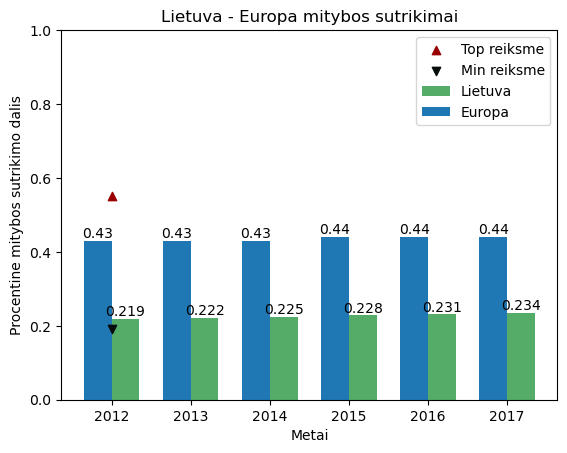

In [260]:
fig, ax = plt.subplots()

w= 0.35
A = ax.bar(metai+ w/2, Eating,width=w, label = "Lietuva", color= '#54ac68')
B = ax.bar(metai- w/2, vid_eat,width=w, label = 'Europa')
ax.set_ylim(0, 1)
ax.bar_label(A)
ax.bar_label(B)
ax.scatter(metaitop8, reiksmetop8,marker= "^", label = "Top reiksme", color = '#980002')
ax.scatter(metaimin9, reiksmemin9, marker= "v",label = "Min reiksme", color = '#070d0d')
plt.legend()
plt.title('Lietuva - Europa mitybos sutrikimai')
plt.xlabel("Metai")
plt.ylabel("Procentine mitybos sutrikimo dalis")
plt.show()

Atvaizduoti grafika, kuris atspindi visus turimus sutrikimus duomenu bazeje Lietuvoje.

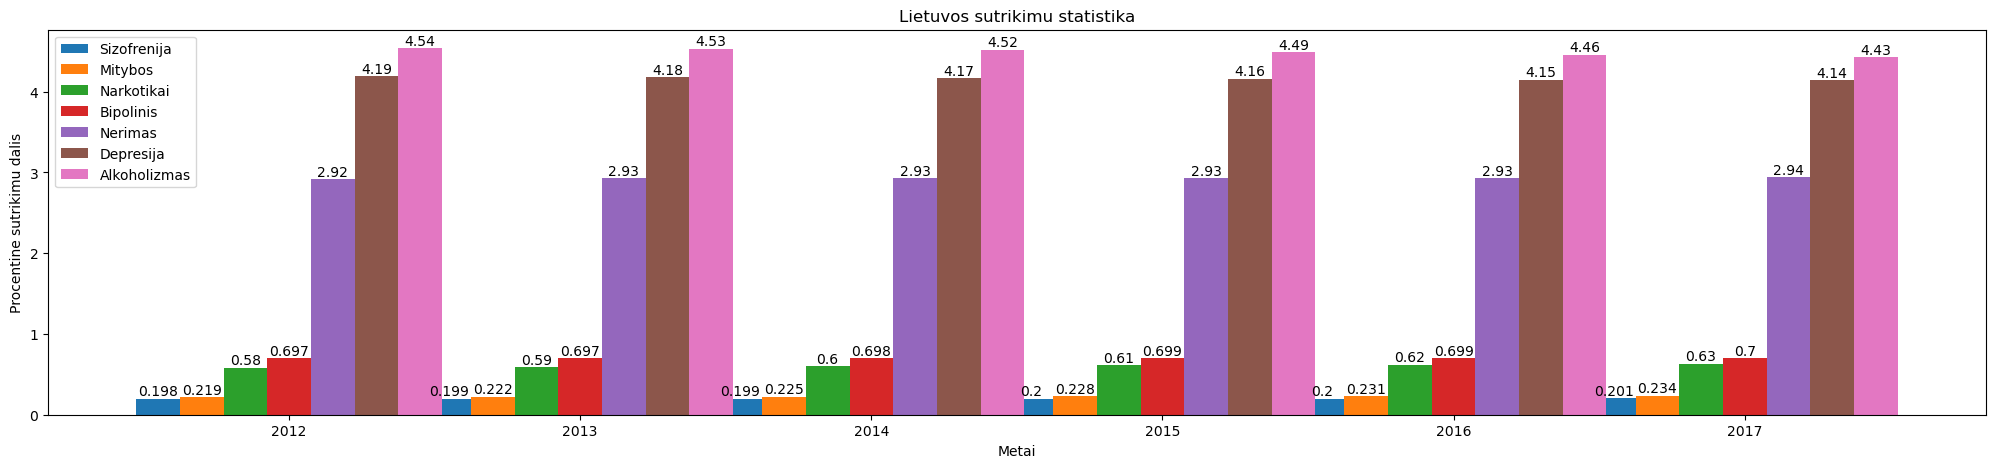

In [259]:
fig, ax = plt.subplots(figsize= (25,5), dpi= 100)
w = 0.15
A= ax.bar(metai - w*3 ,Schizo, width= w, label = 'Sizofrenija')
B =ax.bar(metai - w*2,Eating, width= w, label= 'Mitybos')
C =ax.bar(metai -w,Drug, width= w, label = 'Narkotikai')
D =ax.bar(metai,Bipolar, width= w, label = 'Bipolinis')
E =ax.bar(metai +w,Anx, width= w, label= 'Nerimas')
F =ax.bar(metai +w*2,Dep, width= w, label = 'Depresija')
G =ax.bar(metai +w*3,Alko, width= w, label= 'Alkoholizmas')

ax.bar_label(A)
ax.bar_label(B)
ax.bar_label(C)
ax.bar_label(D)
ax.bar_label(E)
ax.bar_label(F)
ax.bar_label(G)
plt.legend()
plt.title('Lietuvos sutrikimu statistika')
plt.xlabel("Metai")
plt.ylabel("Procentine sutrikimu dalis")
plt.show()